# Problem Statement - 
As a data scientist with the Analytics Department of Ola, focused on driver team attrition and  provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes ( we need to check the driver is going to churn the company or not based on attributes like age , income , city ,grade, rating etc.)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv("ola_driver_scaler.csv")

In [4]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
# dropping unnessary column 
df.drop(["Unnamed: 0"] , axis = 1,inplace = True)

In [6]:
# checking shape of the data
df.shape

(19104, 13)

In [7]:
# checking unique value number of each columns

print(df.nunique())

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64


In [8]:
# getting basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [10]:
# checking columns of the data 
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [11]:
# checking missing value of the data 
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
# creating copy of the data 
df1 = df.copy(deep = True )

In [13]:
df1.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [14]:
# dropping duplicate of the data 
df1.drop_duplicates(keep = "last",inplace = True)

In [15]:
# changing data to their respective datatypes - 

df1["Gender"] = df1["Gender"].astype(dtype = "category")
df1["Education_Level"] = df1["Education_Level"].astype(dtype = "category")
df1["Grade"] = df1["Grade"].astype(dtype = "category")
df1["Quarterly Rating"] = df1["Quarterly Rating"].astype("category")

In [16]:
df1["Dateofjoining"] = pd.to_datetime(df1["Dateofjoining"])
# df1["LastWorkingDate"] = pd.to_datetime(df1["LastWorkingDate"])

In [17]:
# checking data types of the data- 
df1.dtypes

MMM-YY                          object
Driver_ID                        int64
Age                            float64
Gender                        category
City                            object
Education_Level               category
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate                 object
Joining Designation              int64
Grade                         category
Total Business Value             int64
Quarterly Rating              category
dtype: object

In [18]:
df1.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaN,2,2,0,1


## Creating new columns in the dataset for upgrade in rating and increase in income - 

In [20]:
first = df[["Driver_ID"]]

In [21]:
QR1 =  (df1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
QR2 = (df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [22]:
QR1.shape , QR2.shape

((2381, 2), (2381, 2))

In [23]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')
first.head()

,Driver_ID,Quarterly Rating_x,Quarterly Rating_y
0,1,2,2
1,1,2,2
2,1,2,2
3,2,1,1
4,2,1,1


In [24]:
first['Promotion'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)

In [25]:
incm1 =  (df1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (df1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [26]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

In [27]:
first['Raise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [28]:
first = first[['Driver_ID','Raise','Promotion']]

In [29]:
# KNN Imputation for missing numerical data- 

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df1[["Age","Education_Level","Income","Grade","Total Business Value","Quarterly Rating"]] = imputer.fit_transform( df1[["Age","Education_Level","Income","Grade","Total Business Value","Quarterly Rating"]])

In [30]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
            'Income':'sum',
            'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Total Business Value':'sum',
             'Quarterly Rating':'first'}
df1 = df1.groupby([df1['Driver_ID']]).aggregate(functions)
df1['month'] = pd.to_datetime(df1['Dateofjoining']).dt.month
df1['year'] = pd.DatetimeIndex(df1['Dateofjoining']).year
df1.rename(columns={'MMM-YY':'Reporting'},inplace=True)

In [31]:
df1.drop(["Driver_ID"],axis = 1 , inplace = True)

In [32]:
df1.reset_index(inplace = True)

In [33]:
df1.rename(columns = {"LastWorkingDate" : "Target_value" , "Joining Designation" : "Joining_Designation" , "Total Business Value" : "Total_Business_Value" , "Quarterly Rating" : "Rating"},inplace = True)

In [34]:
df1.reset_index(drop=True, inplace=True)
df1 = df1.merge(first,on='Driver_ID')
df1.head()

,Driver_ID,Reporting,Age,Gender,City,Education_Level,Income,Dateofjoining,Target_value,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
0,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,03/11/19,1,1.0,1715580.0,2.0,12,2018,0,0
1,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,03/11/19,1,1.0,1715580.0,2.0,12,2018,0,0
2,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,03/11/19,1,1.0,1715580.0,2.0,12,2018,0,0
3,2,2,31.0,0.0,C7,2.0,134032.0,2020-11-06,None,2,2.0,0.0,1.0,11,2020,0,0
4,2,2,31.0,0.0,C7,2.0,134032.0,2020-11-06,None,2,2.0,0.0,1.0,11,2020,0,0


In [35]:
def fun(x) :
    if type(x) == str :
        return 1
    else :
        return 0

In [36]:
df1["Target_value"] = df1["Target_value"].apply(lambda x : fun(x) )

In [37]:
df1.head()

,Driver_ID,Reporting,Age,Gender,City,Education_Level,Income,Dateofjoining,Target_value,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
0,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,1,1,1.0,1715580.0,2.0,12,2018,0,0
1,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,1,1,1.0,1715580.0,2.0,12,2018,0,0
2,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,1,1,1.0,1715580.0,2.0,12,2018,0,0
3,2,2,31.0,0.0,C7,2.0,134032.0,2020-11-06,0,2,2.0,0.0,1.0,11,2020,0,0
4,2,2,31.0,0.0,C7,2.0,134032.0,2020-11-06,0,2,2.0,0.0,1.0,11,2020,0,0


In [38]:
df1.shape

(19104, 17)

In [39]:
df1.drop_duplicates(keep = "last",inplace = True)

In [40]:
# dropping the duplicate values in our dataset - 
df1.shape

(2381, 17)

In [41]:
df1.isna().sum()

Driver_ID               0
Reporting               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
Target_value            0
Joining_Designation     0
Grade                   0
Total_Business_Value    0
Rating                  0
month                   0
year                    0
Raise                   0
Promotion               0
dtype: int64

In [42]:
df1.describe()

,Driver_ID,Reporting,Age,Education_Level,Income,Target_value,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
count,2381.000000,2381.00000,2381.000000,2381.00000,2.381000e+03,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,8.02352,33.763545,1.00756,5.267603e+05,0.678706,1.820244,2.096598,4.586742e+06,1.486350,7.357413,2018.536329,0.018060,0.342713
std,806.161628,6.78359,5.946568,0.81629,6.231633e+05,0.467071,0.841433,0.941522,9.127115e+06,0.834348,3.143143,1.609597,0.133195,0.474716
min,1.000000,1.00000,21.000000,0.00000,1.088300e+04,0.000000,1.000000,1.000000,-1.385530e+06,1.000000,1.000000,2013.000000,0.000000,0.000000
25%,695.000000,3.00000,30.000000,0.00000,1.398950e+05,0.000000,1.000000,1.000000,0.000000e+00,1.000000,5.000000,2018.000000,0.000000,0.000000
50%,1400.000000,5.00000,33.000000,1.00000,2.929800e+05,1.000000,2.000000,2.000000,8.176800e+05,1.000000,7.000000,2019.000000,0.000000,0.000000
75%,2100.000000,10.00000,37.000000,2.00000,6.514560e+05,1.000000,2.000000,3.000000,4.173650e+06,2.000000,10.000000,2020.000000,0.000000,1.000000
max,2788.000000,24.00000,58.000000,2.00000,4.522032e+06,1.000000,5.000000,5.000000,9.533106e+07,4.000000,12.000000,2020.000000,1.000000,1.000000


# Summary- 
        In the given dataset there are 19104 entries of trip and there are total 2381 drivers detail , Driver’s age, ranging from 21 to 58 years, with a mean of approximately 34 years , The income level of drivers, with a wide range from 10,747 to 188,418, and an average of approximately 65,652 . mean rating of rating is around 2

# Data visualization - 

## Univariate Analysis-

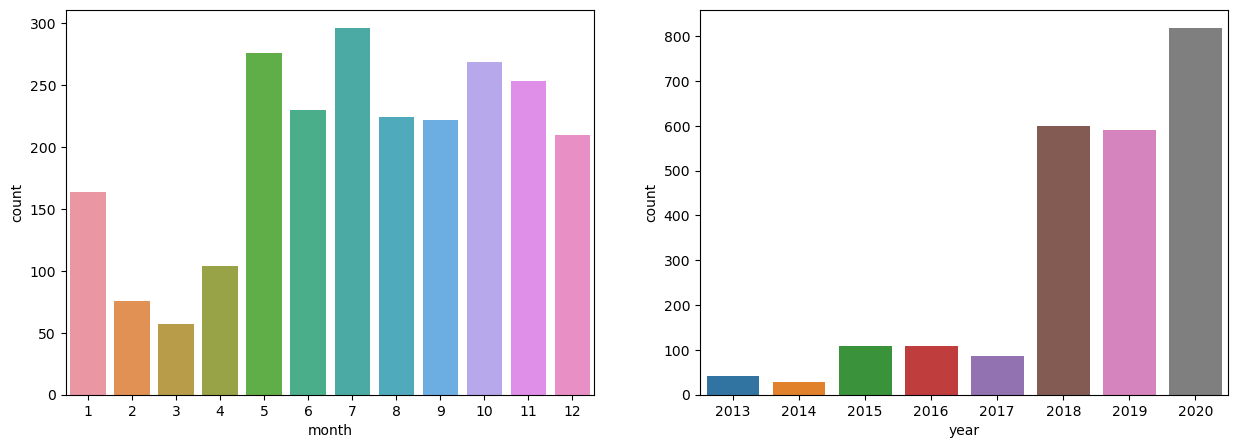

In [46]:
# Number of Drivers per month and per year
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot( data= df1 , x = "month" )
plt.subplot(1,2,2)
sns.countplot( data= df1 , x = "year" )
           
plt.show()

We can see that in month of february and march have least number of drivers and july has maximum number of drivers.
after 2017 there is sudden increase in number of drivers who joined ola.

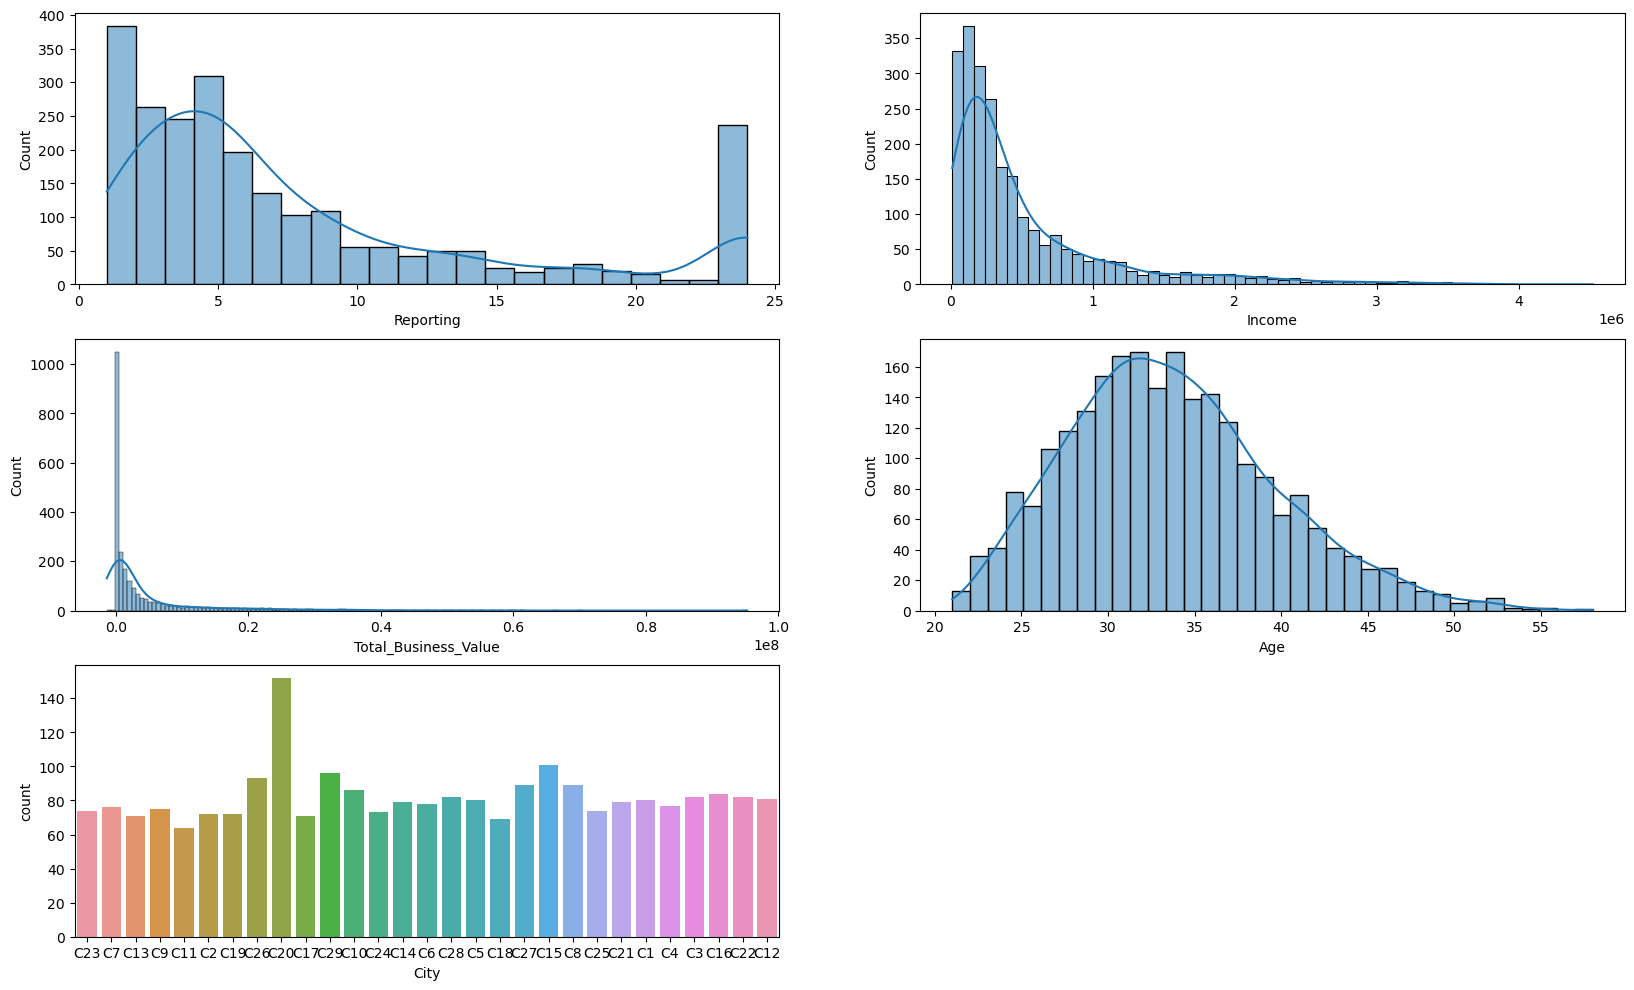

In [48]:
plt.figure(figsize = (20,12))
plt.subplot(3,2,1)
sns.histplot( data= df1 , x = "Reporting" ,kde = True)

plt.subplot(3,2,2)
sns.histplot( data= df1 , x = "Income" ,kde = True )

plt.subplot(3,2,3)
sns.histplot( data= df1 , x = "Total_Business_Value" , kde = True)

plt.subplot(3,2,4)
sns.histplot(data = df1 , x = "Age" , kde = True)

plt.subplot(3,2,5)
sns.countplot(data = df1 , x = "City")

plt.show()

From above graph we can see that Reporting date , Income and total business value is right skewed distributed but most of the driver comes from 25-40 age group. City C20 has maximum number of drivers.

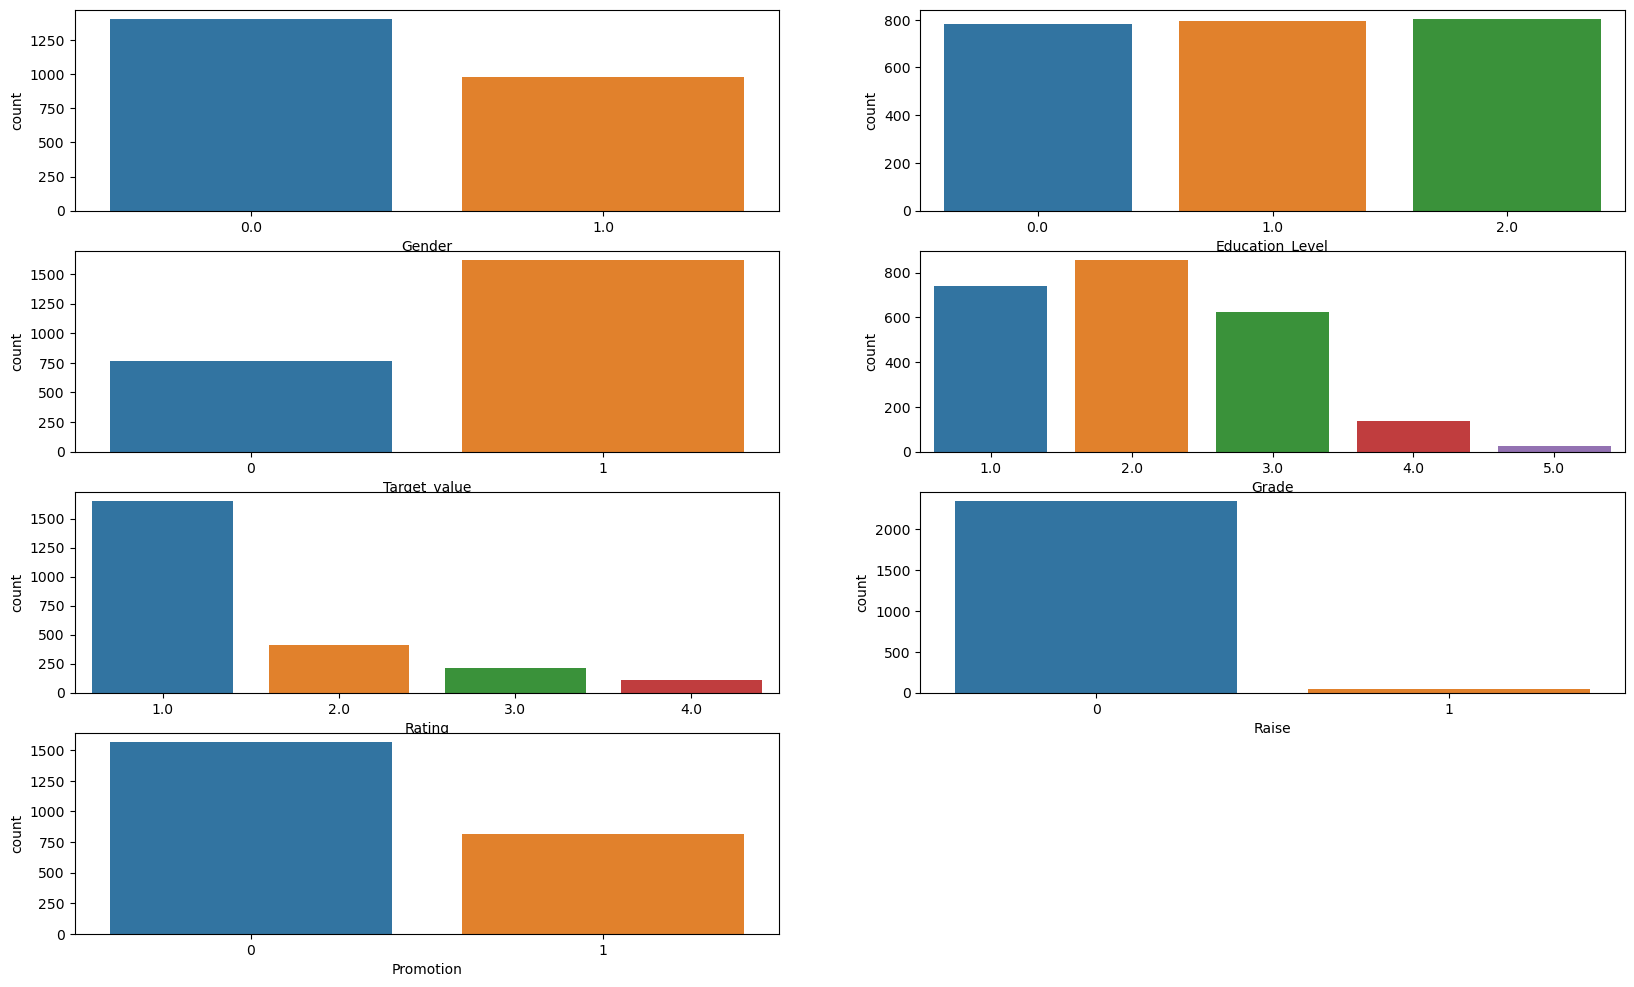

In [50]:
plt.figure(figsize = (20,12))
plt.subplot(4,2,1)
sns.countplot( data= df1 , x = "Gender" )

plt.subplot(4,2,2)
sns.countplot( data= df1 , x = "Education_Level"  )

plt.subplot(4,2,3)
sns.countplot( data= df1 , x = "Target_value" )

plt.subplot(4,2,4)
sns.countplot(data = df1 , x = "Grade")

plt.subplot(4,2,5)
sns.countplot(data = df1 , x = "Rating")

plt.subplot(4,2,6)
sns.countplot(data = df1 , x = "Raise")

plt.subplot(4,2,7)
sns.countplot(data = df1 , x = "Promotion")

plt.show()

From above graphs we can see that there are more male drivers than female and veryfew drivers with higher rating, most of the drivers have churned. Here we can see that the drivers are getting promotion but very few are getting raise that could be a problem.

## Bivariate and Multivariate Analysis - 

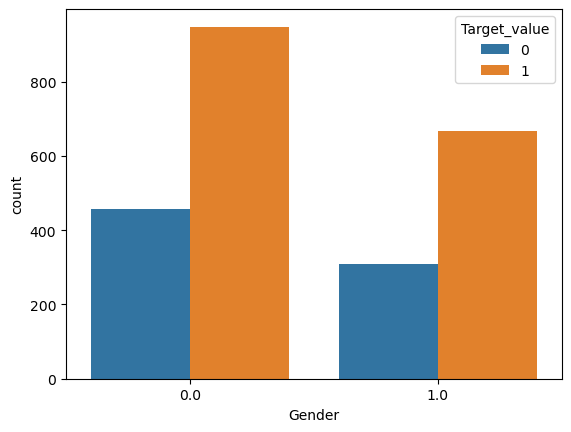

In [53]:
sns.countplot( df1 , x = "Gender" , hue = "Target_value" )
plt.show()

above graph represent that gender count and how many drivers have left the company as we can see that there are more male drivers than female drivers.

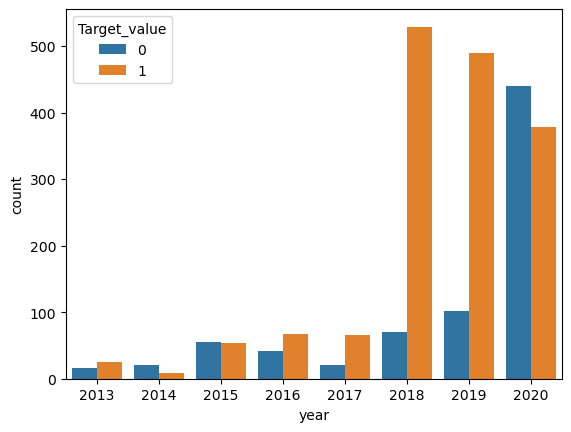

In [55]:
sns.countplot( df1 , x = "year" , hue = "Target_value" )
plt.show()

From above graph we can see that most drivers left company in 2018 & 2019 as compare to other years.

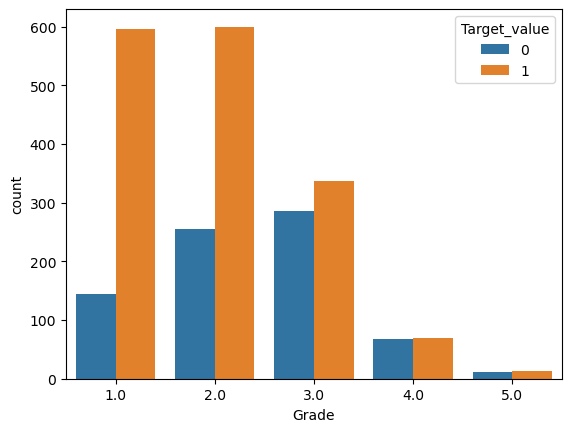

In [57]:
sns.countplot( df1 , x = "Grade" , hue = "Target_value" )
plt.show()

we can see that grade 1 and grade 2 drivers are more churning the company than other grade drivers.

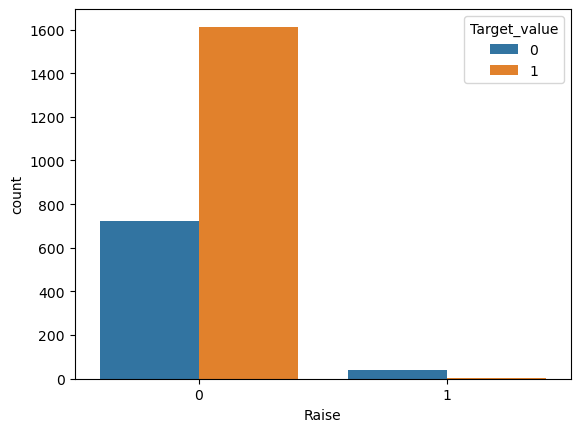

In [59]:
sns.countplot( data = df1 , x = "Raise" , hue = "Target_value")
plt.show()

here we can see that those drivers who got raise they didn't likely to churn as compare to who didn't get raise.

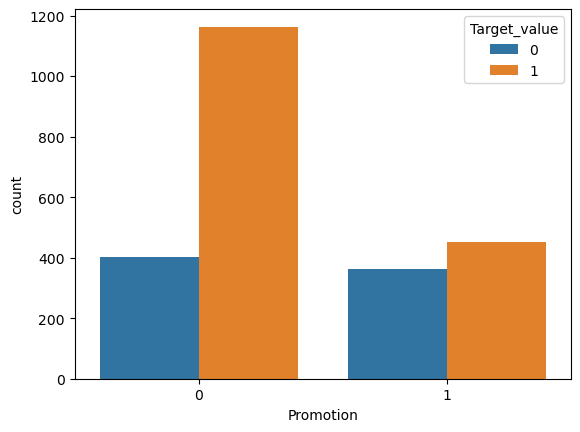

In [61]:
sns.countplot( data = df1 , x = "Promotion" , hue = "Target_value")
plt.show()

from above graph we can say that the drivers who don't get promotion are more likely to churn compare to who gets promotion. 

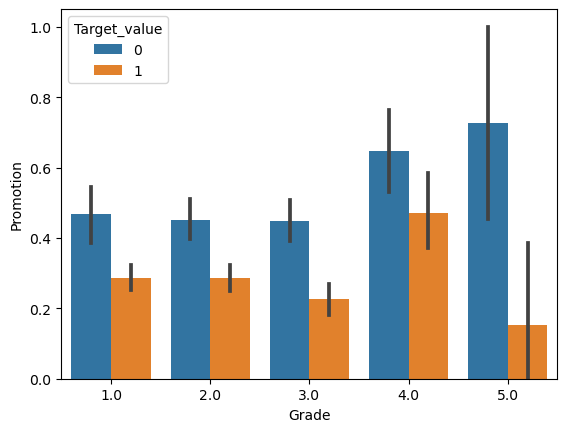

In [63]:
sns.barplot( data = df1 , x= "Grade" , y = "Promotion" , hue = "Target_value")
plt.show()

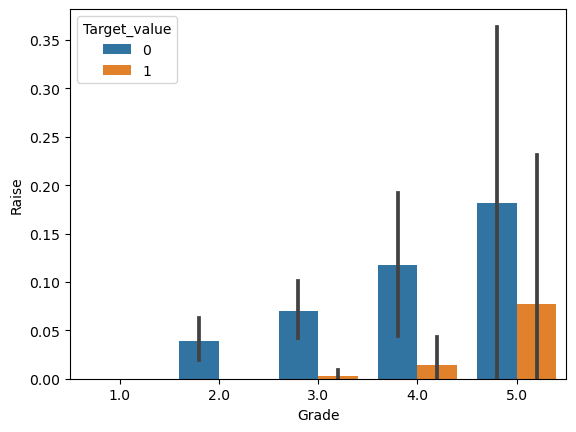

In [64]:
sns.barplot( data = df1 , x= "Grade" , y = "Raise" , hue = "Target_value")
plt.show()

Here we can say that the drives from grade 5 and getting raise they are churning more than other grade drivers.

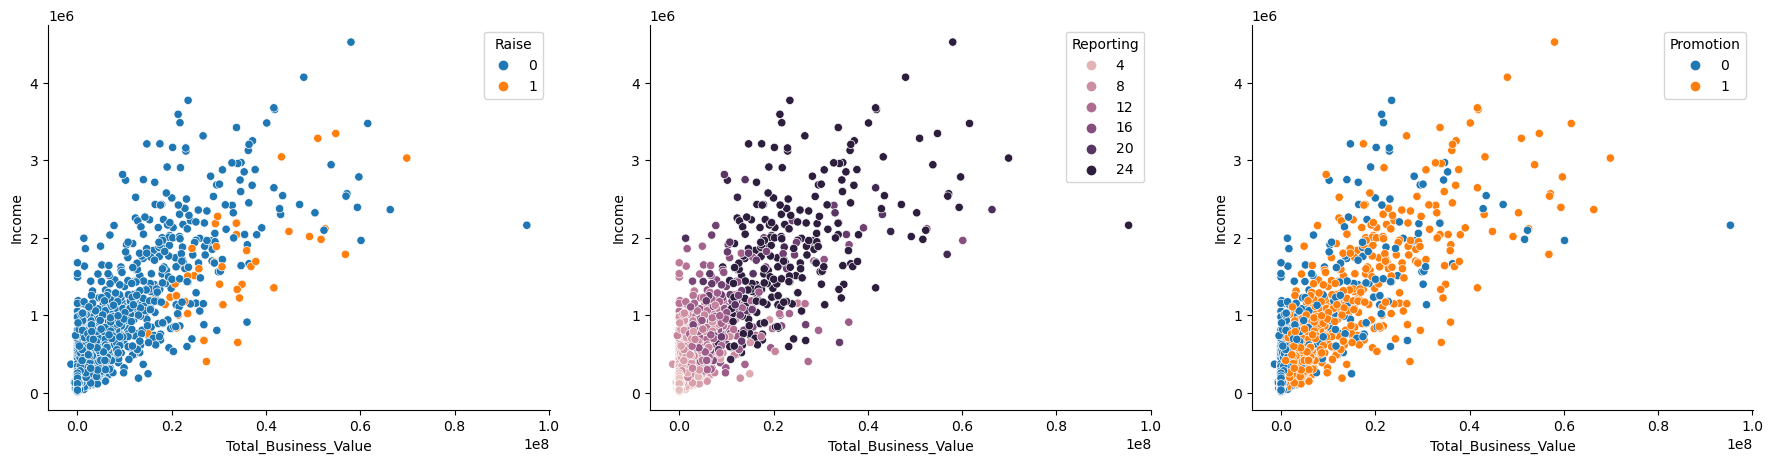

In [66]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df1['Total_Business_Value'],y=df1.Income,hue=df1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=df1['Total_Business_Value'],y=df1.Income,hue=df1.Reporting)
plt.subplot(1,3,3)
sns.scatterplot(x=df1['Total_Business_Value'],y=df1.Income,hue=df1.Promotion)
sns.despine()
plt.show()

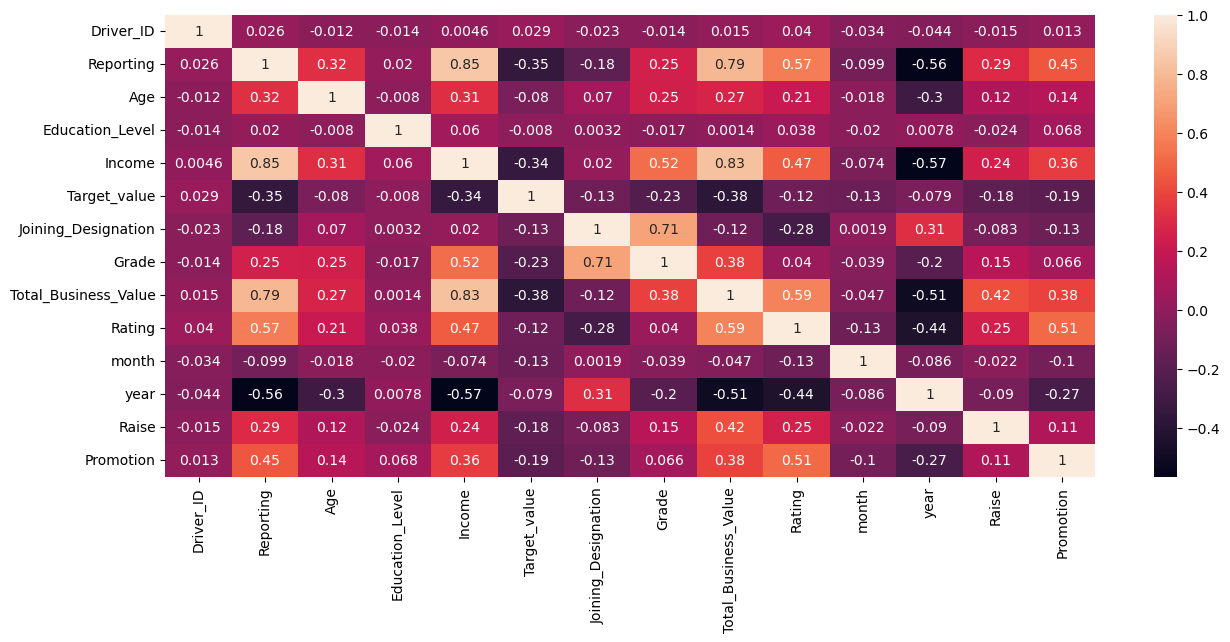

In [67]:
corr = df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True)
plt.show()

From above graph we can see that driver's chrun ( target value ) is highly negatively correlated with Reporting, Income and Total business value. 

##  Outlier treatment - 

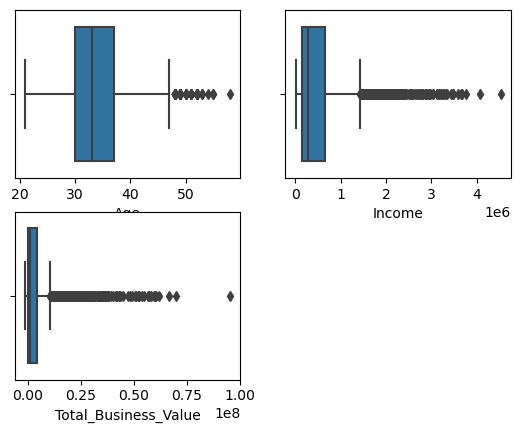

In [70]:

plt.subplot(2,2,1)
sns.boxplot( data = df1 , x = "Age")
plt.subplot(2,2,2)
sns.boxplot( data = df1 , x = "Income")
plt.subplot(2,2,3)
sns.boxplot( data = df1 , x = "Total_Business_Value")
plt.show()

In [71]:
outliers = ["Age" , "Income","Total_Business_Value"]

for a in outliers :
    Q1 = np.quantile(df1[a], 0.25 )
    Q3 = np.quantile( df1[a] , 0.75)
    IQR = Q3 - Q1
    
    outlier = df1[ ((df1[a]) < ( Q1 - 1.5 * IQR)) | ((df1[a]) > ( Q3 + 1.5* IQR )) ]
outlier.head()


,Driver_ID,Reporting,Age,Gender,City,Education_Level,Income,Dateofjoining,Target_value,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
137,25,24,31.0,0.0,C24,1.0,2449848.0,2017-10-30,0,1,3.0,36351110.0,3.0,10,2017,0,1
161,26,24,43.0,0.0,C14,2.0,3027176.0,2018-05-07,0,1,4.0,69867900.0,4.0,5,2018,1,1
233,41,18,35.0,0.0,C29,2.0,1662696.0,2019-07-04,0,4,4.0,21755910.0,1.0,7,2019,0,1
305,54,18,35.0,0.0,C29,1.0,2192705.0,2019-07-11,0,4,5.0,33823290.0,2.0,7,2019,1,1
334,56,24,36.0,1.0,C19,2.0,1925352.0,2018-07-20,0,1,1.0,11723470.0,3.0,7,2018,0,1


In [72]:
x = outlier.index
df1.drop( index = x ,inplace = True )

In [73]:
y = df1["Target_value"]
x = df1.drop( columns = ["Target_value"])
x

,Driver_ID,Reporting,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
2,1,3,28.0,0.0,C23,2.0,172161.0,2018-12-24,1,1.0,1715580.0,2.0,12,2018,0,0
4,2,2,31.0,0.0,C7,2.0,134032.0,2020-11-06,2,2.0,0.0,1.0,11,2020,0,0
9,4,5,43.0,0.0,C13,2.0,328015.0,2019-12-07,2,2.0,350000.0,1.0,12,2019,0,0
12,5,3,29.0,0.0,C9,0.0,139104.0,2019-01-09,1,1.0,120360.0,1.0,1,2019,0,0
17,6,5,31.0,1.0,C11,1.0,393640.0,2020-07-31,3,3.0,1265000.0,1.0,7,2020,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19054,2782,4,26.0,0.0,C19,1.0,118328.0,2019-05-16,1,1.0,0.0,1.0,5,2019,0,0
19081,2785,3,34.0,1.0,C9,0.0,36315.0,2020-08-28,1,1.0,0.0,1.0,8,2020,0,0
19090,2786,9,45.0,0.0,C19,0.0,318330.0,2018-07-31,2,2.0,2815090.0,2.0,7,2018,0,1
19096,2787,6,28.0,1.0,C20,2.0,416988.0,2018-07-21,1,1.0,977830.0,2.0,7,2018,0,1


In [74]:
print(y.head())

2     1
4     0
9     1
12    1
17    0
Name: Target_value, dtype: int64


In [75]:
# Encoding the city column - 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x["City"] = label_encoder.fit_transform(x["City"])

In [76]:
# Dropping the noise columns in our dataset -
x.drop( columns = ["Dateofjoining"] , inplace = True)

## Balncing our dataset using SMOTE technique - 

In [78]:
# Here we can see the imbalance in dataset so balancing the dataset - 

from imblearn.over_sampling import SMOTE

sm = SMOTE( random_state= 42 )
x , y = sm.fit_resample(  x, y )

In [79]:
print( x.shape)
print( y.shape)

(3084, 15)
(3084,)


## Standardization - 

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform( x ) , columns = x.columns )
x.head()

,Driver_ID,Reporting,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Rating,month,year,Raise,Promotion
0,0.000000,0.086957,0.189189,0.0,0.535714,1.0,0.057507,0.00,0.00,0.263235,0.333333,1.000000,0.714286,0.0,0.0
1,0.000359,0.043478,0.270270,0.0,0.928571,1.0,0.043911,0.25,0.25,0.117609,0.000000,0.909091,1.000000,0.0,0.0
2,0.001076,0.173913,0.594595,0.0,0.142857,1.0,0.113080,0.25,0.25,0.147319,0.000000,1.000000,0.857143,0.0,0.0
3,0.001435,0.086957,0.216216,0.0,1.000000,0.0,0.045720,0.00,0.00,0.127826,0.000000,0.000000,0.857143,0.0,0.0
4,0.001794,0.173913,0.270270,1.0,0.071429,0.5,0.136480,0.50,0.50,0.224988,0.000000,0.545455,1.000000,0.0,1.0


## Encoding - 

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
x = encoder.fit_transform( x )

In [84]:
# spliting the data into training , testing and validation - 

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 42 )

x_train, x_val , y_train , y_val = train_test_split( x_train , y_train , test_size = 0.2 , random_state = 42 )

In [85]:
print( "x train sahpe : " , x_train.shape)
print( "y train sahpe : " , y_train.shape)
print( "x validation sahpe : " , x_val.shape)
print( "y validation sahpe : " , y_val.shape)
print( "x test sahpe : " , x_test.shape)
print( "y test sahpe : " , y_test.shape)

x train sahpe :  (1973, 9907)
y train sahpe :  (1973,)
x validation sahpe :  (494, 9907)
y validation sahpe :  (494,)
x test sahpe :  (617, 9907)
y test sahpe :  (617,)


In [86]:
y_train.value_counts()

1    997
0    976
Name: Target_value, dtype: int64

## Model Training - 

Ensemble - Bagging algorithm 

In [89]:
 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score , roc_auc_score , classification_report , confusion_matrix , roc_curve , auc 
import xgboost as xgb 


In [90]:
# Base models - 

dt = DecisionTreeClassifier( random_state= 42 )
rf = RandomForestClassifier( random_state= 42 )

In [91]:
dt.fit( x_train , y_train)
rf.fit( x_train , y_train )


RandomForestClassifier(random_state=42)

In [92]:
y_pred_train_dt = dt.predict( x_train ) 
y_pred_val_dt = dt.predict( x_val )

In [93]:
y_pred_train_rf = rf.predict( x_train ) 
y_pred_val_rf = rf.predict( x_val )

In [94]:
print( "confusion martrix of descision tree classifier in training data" , confusion_matrix( y_train , y_pred_train_dt) )
print( "confusion martrix of descision tree classifier in validation data" , confusion_matrix( y_val , y_pred_val_dt) )

print( "accuracy score of descision tree classifier in training data" , accuracy_score( y_train , y_pred_train_dt) )
print( "accuracy score of descision tree classifier in validation data" , accuracy_score( y_val , y_pred_val_dt) )
print(" roc auc score for decision tree classifier " , roc_auc_score(y_val, y_pred_val_dt))

print("classification report of decision tree algorithm validation - \n", classification_report( y_val, y_pred_val_dt))

confusion martrix of descision tree classifier in training data [[976   0]
 [  0 997]]
confusion martrix of descision tree classifier in validation data [[220  24]
 [ 33 217]]
accuracy score of descision tree classifier in training data 1.0
accuracy score of descision tree classifier in validation data 0.8846153846153846
 roc auc score for decision tree classifier  0.8848196721311474
classification report of decision tree algorithm validation - 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       244
           1       0.90      0.87      0.88       250

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.89      0.88      0.88       494



In [95]:
print( "confusion martrix of random forest classifier in training data" , confusion_matrix( y_train , y_pred_train_rf) )
print( "confusion martrix of random forest classifier in validation data" , confusion_matrix( y_val , y_pred_val_rf) )

print( "accuracy score of random forest classifier in training data" , accuracy_score( y_train , y_pred_train_rf) )
print( "accuracy score of random forest classifier in validation data" , accuracy_score( y_val , y_pred_val_rf) )
print(" roc auc score for random forest classifier " , roc_auc_score(y_val, y_pred_val_rf ) )


print("classification report of random forest algorithm validation - \n" ,classification_report( y_val, y_pred_val_rf))

confusion martrix of random forest classifier in training data [[976   0]
 [  0 997]]
confusion martrix of random forest classifier in validation data [[220  24]
 [ 14 236]]
accuracy score of random forest classifier in training data 1.0
accuracy score of random forest classifier in validation data 0.9230769230769231
 roc auc score for random forest classifier  0.9228196721311476
classification report of random forest algorithm validation - 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       244
           1       0.91      0.94      0.93       250

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



Here we can see that models are overfitted because we are getting high training accuracy but validation score is much lower than training score.

Hyperparameter tuning for decision tree - 

In [98]:
# For decision tree - 


param = {
    "criterion"  : ['gini', 'entropy' ] , 
    "max_depth" : [1,5,10] ,
    'min_samples_split': [2, 5] ,
    'min_samples_leaf' : [10,20,50] , 
    
}

grid_search = GridSearchCV( dt , param , cv=5, scoring='accuracy' )
grid_search.fit( x_train , y_train )


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [99]:
best_dt = grid_search.best_params_
print(best_dt)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [100]:
param1 = {
    "criterion"  : ['entropy' ] , 
    "max_depth" : [10,15,20] ,
    'min_samples_split': [2, 5] ,
    'min_samples_leaf' : [5,7,10] , 
    
}

grid_search = GridSearchCV( dt , param1 , cv=5, scoring='accuracy' )
grid_search.fit( x_train , y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [101]:
best_dt1 = grid_search.best_params_
print( best_dt1 )

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [102]:
dt = DecisionTreeClassifier( criterion= "entropy" , max_depth= 15 , min_samples_leaf=10,random_state= 42)
dt.fit( x_train , y_train )

y_pred_train_dt = dt.predict( x_train ) 
y_pred_val_dt = dt.predict( x_val )

In [103]:
print( "confusion martrix of descision tree classifier in training data" , confusion_matrix( y_train , y_pred_train_dt) )
print( "confusion martrix of descision tree classifier in validation data" , confusion_matrix( y_val , y_pred_val_dt) )

print( "accuracy score of descision tree classifier in training data" , accuracy_score( y_train , y_pred_train_dt) )
print( "accuracy score of descision tree classifier in validation data" , accuracy_score( y_val , y_pred_val_dt) )
print(" roc auc score for decision tree classifier " , roc_auc_score(y_val, y_pred_val_dt))


print("classification report of decision tree algorithm validation - \n", classification_report( y_val, y_pred_val_dt))

confusion martrix of descision tree classifier in training data [[910  66]
 [ 94 903]]
confusion martrix of descision tree classifier in validation data [[219  25]
 [ 30 220]]
accuracy score of descision tree classifier in training data 0.9189052204764319
accuracy score of descision tree classifier in validation data 0.888663967611336
 roc auc score for decision tree classifier  0.8887704918032786
classification report of decision tree algorithm validation - 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       244
           1       0.90      0.88      0.89       250

    accuracy                           0.89       494
   macro avg       0.89      0.89      0.89       494
weighted avg       0.89      0.89      0.89       494



In [104]:
# Predict probabilities
y_pred_prob = dt.predict_proba(x_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fpr , tpr)

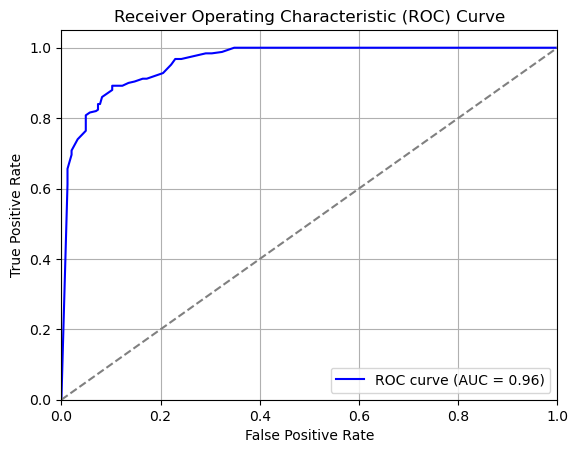

In [105]:
# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


From above calculation we can see that the our decision tree model accuracy score around 0.88866 and f1 score is 0.89 which good and our roc auc graph that confirms the model's reliability. 

Hyperparameter tuning for Random forest - 

In [108]:
param3 = {
    "n_estimators" : [50,100,150] ,
    'criterion'  : ['gini', 'entropy' ] , 
    "max_depth" : [1,5,10] ,
    'min_samples_split': [2, 5] ,
    'min_samples_leaf' : [5,7,10] , 
    
}

grid_search1 = GridSearchCV( rf , param3 , cv=5, scoring='accuracy' )
grid_search1.fit( x_train , y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [109]:
best_rf = grid_search1.best_params_
print( best_rf )

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [110]:
param4 = {
    "n_estimators" : [150,180,200] ,
    "criterion" : ["gini"],
    "max_depth" : [10,20,25] ,
    'min_samples_leaf' : [10,15,20] 
    
}

grid_search2 = GridSearchCV( rf , param4 , cv=5, scoring='accuracy' )
grid_search2.fit( x_train , y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 25],
                         'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [150, 180, 200]},
             scoring='accuracy')

In [111]:
best_rf = grid_search2.best_estimator_
print( best_rf )

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=180,
                       random_state=42)


In [112]:
rf = RandomForestClassifier(n_estimators=180, criterion= "gini" , max_depth= 10 , min_samples_leaf= 10 , random_state= 42)
rf.fit( x_train , y_train )

y_pred_train_rf = rf.predict( x_train ) 
y_pred_val_rf = rf.predict( x_val )

In [113]:
print( "confusion martrix of random forest classifier in training data" , confusion_matrix( y_train , y_pred_train_rf) )
print( "confusion martrix of random forest classifier in validation data" , confusion_matrix( y_val , y_pred_val_rf) )

print( "accuracy score of random forest classifier in training data" , accuracy_score( y_train , y_pred_train_rf) )
print( "accuracy score of random forest classifier in validation data" , accuracy_score( y_val , y_pred_val_rf)  )
print(" roc auc score for random forest classifier " , roc_auc_score(y_val, y_pred_val_rf))

print("roc auc")

print("classification report of random forest algo validation - \n" ,classification_report( y_val, y_pred_val_rf))

confusion martrix of random forest classifier in training data [[618 358]
 [ 14 983]]
confusion martrix of random forest classifier in validation data [[153  91]
 [  5 245]]
accuracy score of random forest classifier in training data 0.811454637607704
accuracy score of random forest classifier in validation data 0.805668016194332
 roc auc score for random forest classifier  0.8035245901639344
roc auc
classification report of random forest algo validation - 
               precision    recall  f1-score   support

           0       0.97      0.63      0.76       244
           1       0.73      0.98      0.84       250

    accuracy                           0.81       494
   macro avg       0.85      0.80      0.80       494
weighted avg       0.85      0.81      0.80       494



In [114]:
# Predict probabilities
y_pred_prob = rf.predict_proba(x_val)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

roc_auc = auc(fpr , tpr)

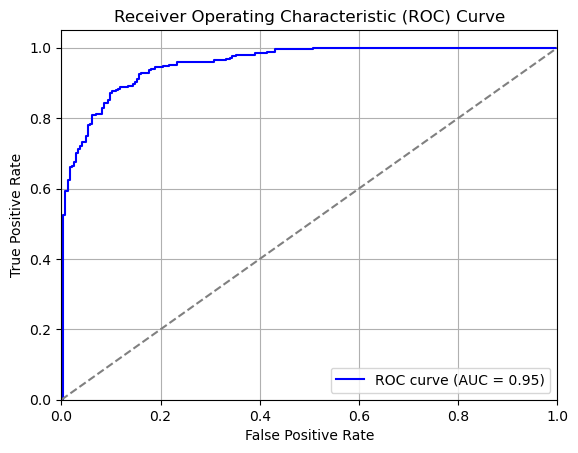

In [115]:
# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

From above calculation and auc roc graph we conclude that our Random Forest model accuracy score is around 0.8056 and f1 score is 0.76 that we can also see from graph.

Ensemble - Boosting Algorithm 

In [118]:
xgb_train = xgb.DMatrix( x_train, y_train, enable_categorical=True)
xgb_val = xgb.DMatrix( x_val, y_val, enable_categorical=True)


In [119]:
n=100
params = {
	'objective': 'multi:softmax',
    "num_class" : 2 ,
	'max_depth': 4,
	'learning_rate': 0.1,
    "seed" : 42 ,
}

model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)


In [120]:
pred_train = model.predict( xgb_train)
preds = model.predict( xgb_val )
preds = preds.astype(int)
accu_train = accuracy_score( y_train , pred_train )
accuracy= accuracy_score(y_val,preds)
print('Accuracy of the model training is:', accu_train *100)
print('Accuracy of the model validation is:', accuracy*100)
print("roc auc score of xgboost algorithm " , roc_auc_score(y_val , preds ))
print( 'classification report of xgboost algorithm' ,classification_report( y_val , preds))



Accuracy of the model training is: 95.94526102382159
Accuracy of the model validation is: 94.53441295546558
roc auc score of xgboost algorithm  0.9454590163934425
classification report of xgboost algorithm               precision    recall  f1-score   support

           0       0.94      0.95      0.95       244
           1       0.96      0.94      0.95       250

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



We can clearly see that our XGboost model is performing very well with accuracy score for validation is 0.94534 is very great and model isn't overfitted and getting the f1 score 0.95 so this the best model for our prediction of driver churn. 

# Checking the best model's final testing accuracy on unseen data - 

In [123]:
xgb_test =  xgb.DMatrix( x_test, y_test, enable_categorical=True)

y_prediction = model.predict( xgb_test)
accurac_of_model = accuracy_score( y_test , y_prediction )
print("Model's accuracy score ( in precentage ) on unseen data :", accurac_of_model*100)

Model's accuracy score ( in precentage ) on unseen data : 91.08589951377634


# Insights and Recommendations - 

Model Performance Overview:

Decision Tree Model:
Accuracy: 0.8886
F1 Score: 0.89

Random Forest Model:
Accuracy: 0.8056
F1 Score: 0.76

XGBoost Model:
Accuracy: 0.94
F1 Score: 0.95

XGBoost model has the highest accuracy (0.94) and F1 score (0.95) among the three models. The high F1 score indicates a good balance between precision and recall, making it highly effective in identifying drivers churn while minimizing false positives and false negatives. Decision Tree Model also has a relatively high accuracy (0.8886) and a good F1 score (0.89), it does not perform as well as XGBoost. company should use XGboost model to predict the driver's churn probabiliy.


- We see that there are around 55% male employees and 45% female employees.
- The percentages of employees with different education levels are almost same.
- Very few driver got raise and around 35% driver got promotion. The comapny neeeds to focus on the drivers why they aren't geting more raise and promotion.
- After 2017 there is sudden increase in the number of drivers and driver's churn and march month has very less number of drivers reporting after that there is increase in number. 
  company needs to pay attention to employees so they shouldn't churn the company.
- Company has very less number of drivers that has grade 5.
- There is any driver that got 5 star quraterly rating. so company needs to focus on how to increase the drivers that has grade 5 and should maintain quarterly 5 rating
- City c20 has highest number of employees. company should give more attendtion in this city.
- The income of employees is dispersed and the total business income is more disperesd. so company can focus why some driver's income is lesser than average.
